In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from nbd_utils_code import nbd_read

# Function to calculate the snapshot index based on the desired time
def get_snapshot_index_from_time(desired_time, total_evolution_time, time_between_snapshots):
    total_snapshots = int(total_evolution_time / time_between_snapshots)
    snapshot_index = int(desired_time / time_between_snapshots)
    return min(snapshot_index, total_snapshots - 1)  # Ensure the index is within range

# Function to calculate the center of mass of the cluster
def calculate_center_of_mass(x, y, z, m):
    total_mass = np.sum(m)
    x_com = np.sum(x * m) / total_mass
    y_com = np.sum(y * m) / total_mass
    z_com = np.sum(z * m) / total_mass
    return x_com, y_com, z_com

# Function to calculate the number of stars inside a sphere of given radius centered at a point
def count_stars_inside_sphere(x, y, z, center, radius=0.5):
    distances = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
    return np.sum(distances <= radius)

# Function to create a transparent sphere of given radius and center
def plot_sphere(ax, center, radius=0.5, color='b', alpha=0.1):
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
    x = radius * np.cos(u) * np.sin(v) + center[0]
    y = radius * np.sin(u) * np.sin(v) + center[1]
    z = radius * np.cos(v) + center[2]
    ax.plot_surface(x, y, z, color=color, alpha=alpha, edgecolor='none')

# Function to plot 2D and 3D distributions
def plot_cluster(snapshot_directory, desired_time, total_evolution_time, time_between_snapshots):
    # Get sorted list of snapshot files
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    # Get snapshot index based on time
    snapshot_index = get_snapshot_index_from_time(desired_time, total_evolution_time, time_between_snapshots)

    # Load the data from the specified snapshot
    snapshot_file = snapshot_files[snapshot_index]
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    # Extract positions and masses
    x, y, z = data.x, data.y, data.z
    m = data.mass

    # Calculate the center of mass
    x_com, y_com, z_com = calculate_center_of_mass(x, y, z, m)
    center_of_mass = (x_com, y_com, z_com)

    # Count the number of stars inside the sphere of radius 0.5 pc
    num_stars_inside_sphere = count_stars_inside_sphere(x, y, z, center_of_mass, radius=0.5)

    # Plot 2D distribution (x vs y) with circle (sphere's projection)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=m, cmap='viridis', s=20, edgecolor='k')
    plt.colorbar(label='Mass (M☉)')
    
    # Add a transparent circle to represent the cluster's boundary (2D projection of the sphere)
    circle = plt.Circle((x_com, y_com), 0.5, color='b', fill=False, linestyle='--')
    plt.gca().add_artist(circle)
    
    # Display the number of stars inside the sphere on the 2D plot
    plt.text(0.05, 0.95, f'Stars inside sphere: {num_stars_inside_sphere}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.xlabel('x (pc)')
    plt.ylabel('y (pc)')
    plt.title(f'2D Spatial Distribution of Cluster at t = {desired_time} years')
    plt.grid(True)
    plt.xlim(0.6, 2.0)
    plt.ylim(1, 2.25)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    # Plot 3D distribution (x, y, z) with transparent sphere centered at center of mass
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=m, cmap='viridis', s=20, edgecolor='k')

    # Add transparent sphere to represent cluster boundary centered at center of mass
    plot_sphere(ax, center=center_of_mass, radius=0.5, color='b', alpha=0.1)

    # Display the number of stars inside the sphere on the 3D plot
    ax.text2D(0.05, 0.95, f'Stars inside sphere: {num_stars_inside_sphere}', transform=ax.transAxes, fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.colorbar(sc, label='Mass (M☉)')
    ax.set_xlabel('x (pc)')
    ax.set_ylabel('y (pc)')
    ax.set_zlabel('z (pc)')
    ax.set_title(f'3D Spatial Distribution of Cluster at t = {desired_time} years')
    ax.set_box_aspect([1, 1, 1])  # Aspect ratio of the 3D plot
    # ax.set_xlim([x_com - 0.6, x_com + 0.6])
    # ax.set_ylim([y_com - 0.6, y_com + 0.6])
    # ax.set_zlim([z_com - 0.6, z_com + 0.6])
    plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0040
N =  70
time 8200000.0
units 1.98847e+33 3.085677581e+18 31556952.0


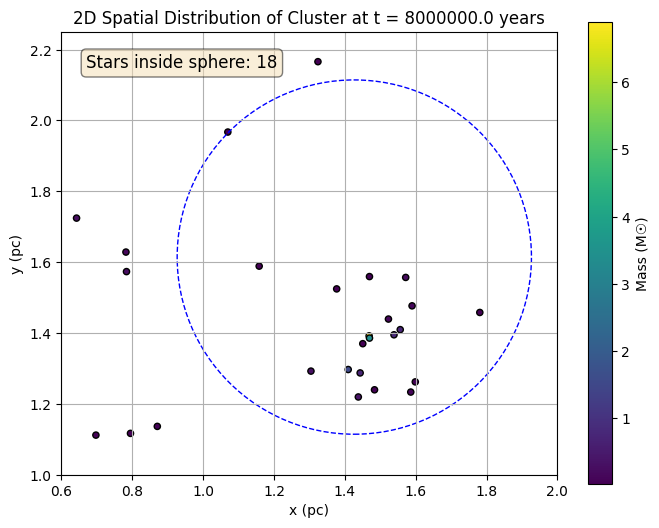

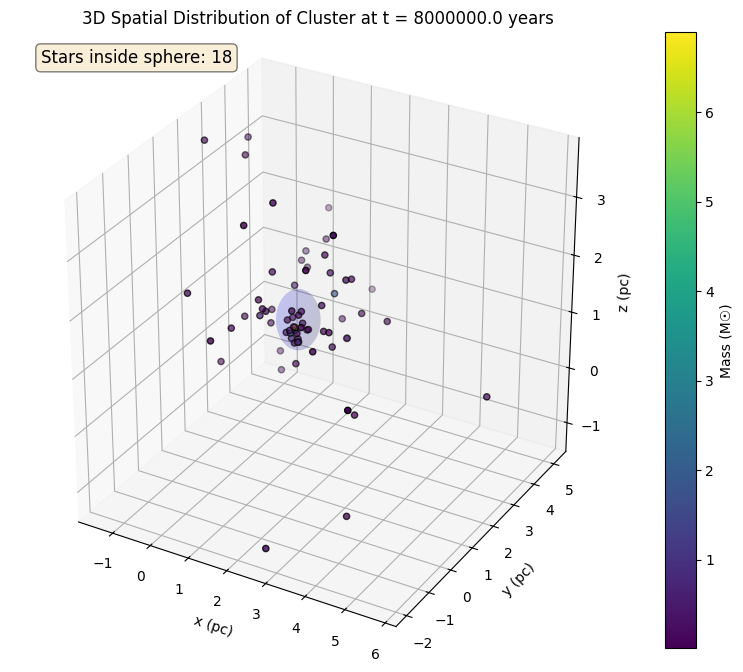

In [77]:

snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'

total_evolution_time = 177.6e6  
time_between_snapshots = 0.2e6 

desired_time = 8e6
plot_cluster(snapshot_directory, desired_time, total_evolution_time, time_between_snapshots)


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

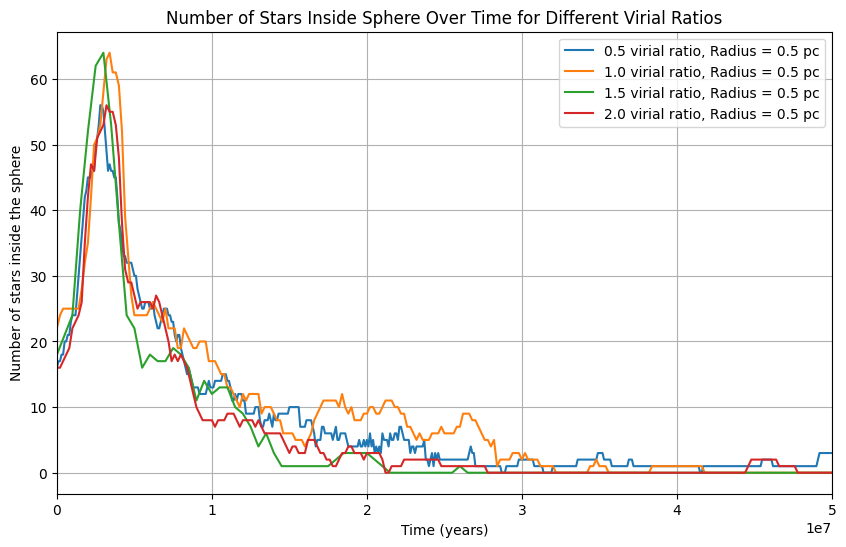

In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read

# Function to calculate the center of mass of the cluster
def calculate_center_of_mass(x, y, z, m):
    total_mass = np.sum(m)
    x_com = np.sum(x * m) / total_mass
    y_com = np.sum(y * m) / total_mass
    z_com = np.sum(z * m) / total_mass
    return x_com, y_com, z_com

# Function to calculate the number of stars inside a sphere of given radius centered at a point
def count_stars_inside_sphere(x, y, z, center, radius=0.5):
    distances = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
    return np.sum(distances <= radius)

# Function to get the number of stars inside the sphere at each snapshot
def calculate_stars_inside_sphere_at_all_snapshots(snapshot_directory, total_evolution_time, time_between_snapshots, radius=0.5):
    # Get sorted list of snapshot files
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])
    
    times = []
    stars_inside_sphere = []

    for i, snapshot_file in enumerate(snapshot_files):
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath)

        # Extract positions and masses
        x, y, z = data.x, data.y, data.z
        m = data.mass

        # Calculate the center of mass
        x_com, y_com, z_com = calculate_center_of_mass(x, y, z, m)
        center_of_mass = (x_com, y_com, z_com)

        # Count the number of stars inside the sphere of radius `radius`
        num_stars_inside_sphere = count_stars_inside_sphere(x, y, z, center_of_mass, radius)
        
        # Calculate the time of this snapshot
        snapshot_time = i * time_between_snapshots
        
        # Append the time and number of stars to the lists
        times.append(snapshot_time)
        stars_inside_sphere.append(num_stars_inside_sphere)

    return times, stars_inside_sphere

# Function to plot the number of stars inside the sphere as a function of time for all virial ratios
def plot_stars_inside_sphere_all_virial_ratios(simulation_directories, radius=0.5):
    plt.figure(figsize=(10, 6))

    for virial_ratio, snapshot_directory in simulation_directories.items():
        if virial_ratio == '0.5 virial ratio':
            total_evolution_time = 88.4e6
            time_between_snapshots = 0.1e6
        elif virial_ratio == '1.0 virial ratio':
            total_evolution_time = 125.4e6
            time_between_snapshots = 0.2e6
        elif virial_ratio == '1.5 virial ratio':
            total_evolution_time = 152.5e6
            time_between_snapshots = 0.5e6
        elif virial_ratio == '2.0 virial ratio':
            total_evolution_time = 177.6e6
            time_between_snapshots = 0.2e6

        # Get the number of stars inside the sphere for this simulation
        times, stars_inside_sphere = calculate_stars_inside_sphere_at_all_snapshots(snapshot_directory, total_evolution_time, time_between_snapshots, radius)

        # Plot the number of stars inside the sphere over time
        plt.plot(times, stars_inside_sphere, linestyle='-', label=f'{virial_ratio}, Radius = {radius} pc')

    # Customize the plot
    plt.xlabel('Time (years)')
    plt.ylabel('Number of stars inside the sphere')
    plt.title('Number of Stars Inside Sphere Over Time for Different Virial Ratios')
    plt.grid(True)
    plt.xlim(0, 0.5e8)
    plt.legend()
    plt.show()

# Dictionary of simulation directories
simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_125Mev_1.0vir',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'
}

# Call the function to plot the number of stars inside the sphere for all virial ratios
plot_stars_inside_sphere_all_virial_ratios(simulation_directories, radius=0.5)


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

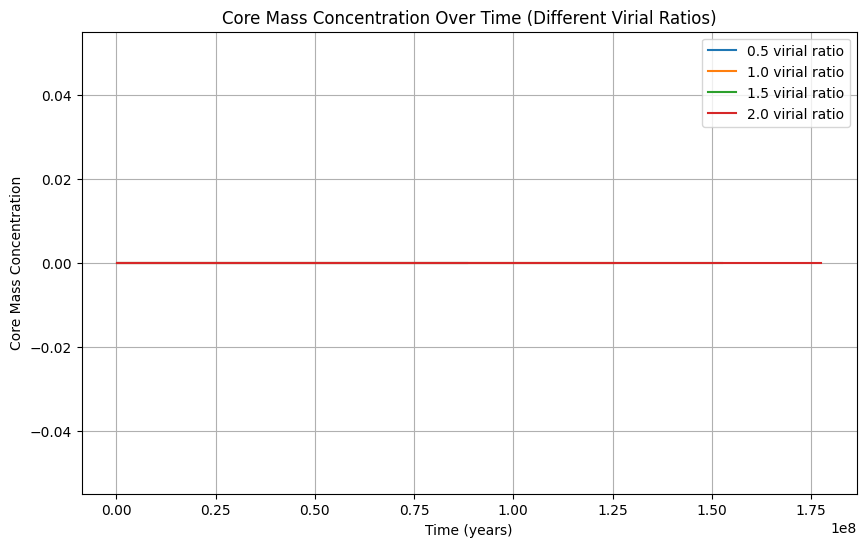

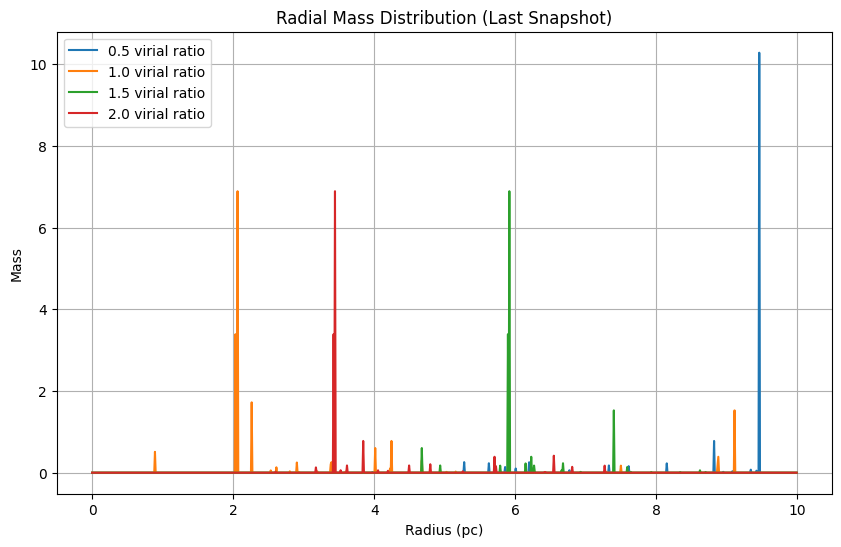

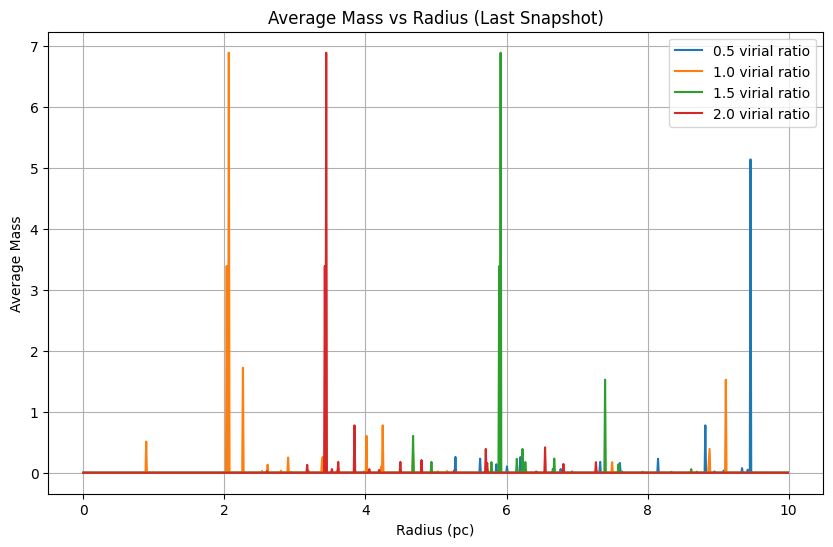

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read

# Function to compute the distance of each star from the cluster center
def compute_distances(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

# Function to compute core mass concentration
def core_mass_concentration(masses, distances, core_radius=0.1):
    core_masses = masses[distances <= core_radius]
    return np.sum(core_masses)

# Function to compute radial mass distribution
def radial_mass_distribution(masses, distances, bins):
    radial_bins = np.digitize(distances, bins)
    mass_distribution = np.array([np.sum(masses[radial_bins == i]) for i in range(1, len(bins))])
    return mass_distribution

# Function to compute average mass vs. radius
def average_mass_vs_radius(masses, distances, bins):
    radial_bins = np.digitize(distances, bins)
    average_mass = np.array([np.mean(masses[radial_bins == i]) if np.sum(radial_bins == i) > 0 else 0 for i in range(1, len(bins))])
    return average_mass

# Directories for simulations
simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_125Mev_1.0vir',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'
}

# Parameters
core_radius = 0.1  # Define the core radius for core mass concentration
bins = np.linspace(0, 10, 1000)  # Radial bins for mass distribution and average mass

# Lists to store results for all virial ratios
times = {key: [] for key in simulation_directories}
core_mass_concentrations = {key: [] for key in simulation_directories}
radial_mass_distributions = {key: [] for key in simulation_directories}
average_masses = {key: [] for key in simulation_directories}

# Iterate over each virial ratio
for virial_ratio, snapshot_directory in simulation_directories.items():
    
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath)

        # Get positions and masses
        x, y, z = data.x, data.y, data.z
        m = data.mass
        
        # Compute distances from the center
        distances = compute_distances(x, y, z)
        
        # Store simulation time
        times[virial_ratio].append(data.time)
        
        # Calculate core mass concentration
        core_mass = core_mass_concentration(m, distances, core_radius=core_radius)
        core_mass_concentrations[virial_ratio].append(core_mass)
        
        # Calculate radial mass distribution
        radial_distribution = radial_mass_distribution(m, distances, bins)
        radial_mass_distributions[virial_ratio].append(radial_distribution)
        
        # Calculate average mass vs. radius
        avg_mass = average_mass_vs_radius(m, distances, bins)
        average_masses[virial_ratio].append(avg_mass)

# Plot Core Mass Concentration over time
plt.figure(figsize=(10, 6))
for virial_ratio in simulation_directories:
    plt.plot(times[virial_ratio], core_mass_concentrations[virial_ratio], label=virial_ratio)
plt.xlabel('Time (years)')
plt.ylabel('Core Mass Concentration')
plt.title('Core Mass Concentration Over Time (Different Virial Ratios)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Radial Mass Distribution for last snapshot
plt.figure(figsize=(10, 6))
for virial_ratio in simulation_directories:
    plt.plot(bins[:-1], radial_mass_distributions[virial_ratio][-1], label=virial_ratio)
plt.xlabel('Radius (pc)')
plt.ylabel('Mass')
plt.title('Radial Mass Distribution (Last Snapshot)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Average Mass vs Radius for last snapshot
plt.figure(figsize=(10, 6))
for virial_ratio in simulation_directories:
    plt.plot(bins[:-1], average_masses[virial_ratio][-1], label=virial_ratio)
plt.xlabel('Radius (pc)')
plt.ylabel('Average Mass')
plt.title('Average Mass vs Radius (Last Snapshot)')
plt.legend()
plt.grid(True)
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

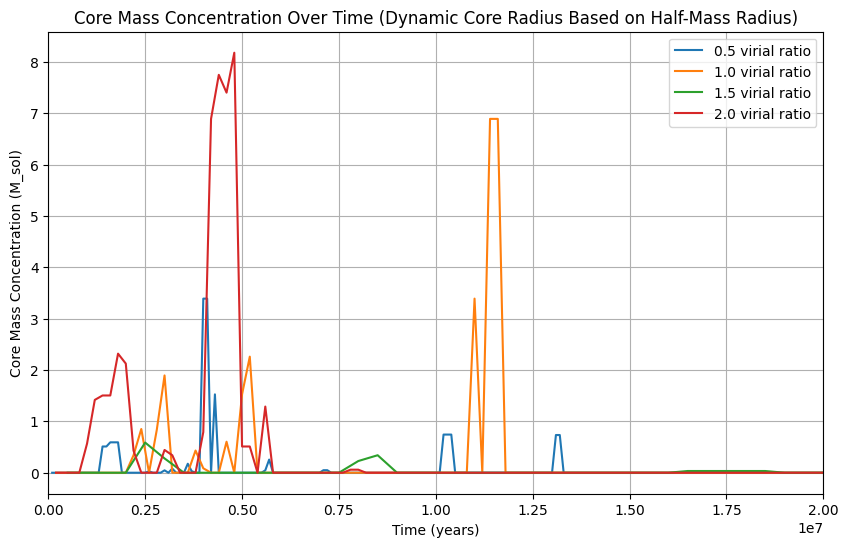

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read

# Fraction of half-mass radius to use for core region
core_fraction = 0.2  # 10% of the half-mass radius

# Function to calculate the center of mass
def calculate_center_of_mass(x, y, z, m):
    total_mass = np.sum(m)
    center_of_mass_x = np.sum(x * m) / total_mass
    center_of_mass_y = np.sum(y * m) / total_mass
    center_of_mass_z = np.sum(z * m) / total_mass
    return center_of_mass_x, center_of_mass_y, center_of_mass_z

# Function to calculate the half-mass radius
def calculate_half_mass_radius(x, y, z, m):
    # Calculate distances from the center of mass
    center_of_mass = calculate_center_of_mass(x, y, z, m)
    distances = np.sqrt((x - center_of_mass[0])**2 + (y - center_of_mass[1])**2 + (z - center_of_mass[2])**2)

    # Sort stars by distance
    sorted_indices = np.argsort(distances)
    sorted_distances = distances[sorted_indices]
    sorted_masses = m[sorted_indices]

    # Cumulative mass
    cumulative_mass = np.cumsum(sorted_masses)

    # Total mass
    total_mass = cumulative_mass[-1]

    # Find the index where half of the total mass is reached
    half_mass_index = np.searchsorted(cumulative_mass, total_mass / 2)

    # The corresponding distance is the half-mass radius
    half_mass_radius = sorted_distances[half_mass_index]
    return half_mass_radius

# Function to calculate the core mass based on a dynamic core radius (fraction of the half-mass radius)
def calculate_core_mass(x, y, z, m, half_mass_radius, core_fraction):
    center_of_mass = calculate_center_of_mass(x, y, z, m)
    core_radius = core_fraction * half_mass_radius  # Core radius as a fraction of half-mass radius
    distances = np.sqrt((x - center_of_mass[0])**2 + (y - center_of_mass[1])**2 + (z - center_of_mass[2])**2)  # distance from the center of mass
    core_mask = distances < core_radius  # boolean mask for stars within the core radius
    core_mass = np.sum(m[core_mask])  # sum of masses within the core radius
    return core_mass

# Dictionary to hold results for each virial ratio
core_mass_over_time = {key: [] for key in simulation_directories.keys()}
times_over_time = {key: [] for key in simulation_directories.keys()}

simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_125Mev_1.0vir',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'
}


# Loop through each simulation directory
for virial_ratio, snapshot_directory in simulation_directories.items():
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])
    
    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath)

        # Get positions and masses
        x, y, z = data.x, data.y, data.z
        m = data.mass

        # Calculate half-mass radius for this snapshot
        half_mass_radius = calculate_half_mass_radius(x, y, z, m)

        # Calculate core mass using a fraction of the half-mass radius
        core_mass = calculate_core_mass(x, y, z, m, half_mass_radius, core_fraction)

        # Store time and core mass
        times_over_time[virial_ratio].append(data.time)
        core_mass_over_time[virial_ratio].append(core_mass)

# Plotting core mass concentration over time for each virial ratio
plt.figure(figsize=(10, 6))

for virial_ratio, times in times_over_time.items():
    plt.plot(times, core_mass_over_time[virial_ratio], label=f'{virial_ratio}')

plt.xlim(0, 2e7)
plt.xlabel('Time (years)')
plt.ylabel('Core Mass Concentration (M_sol)')
plt.title('Core Mass Concentration Over Time (Dynamic Core Radius Based on Half-Mass Radius)')
plt.legend()
plt.grid(True)
plt.show()
